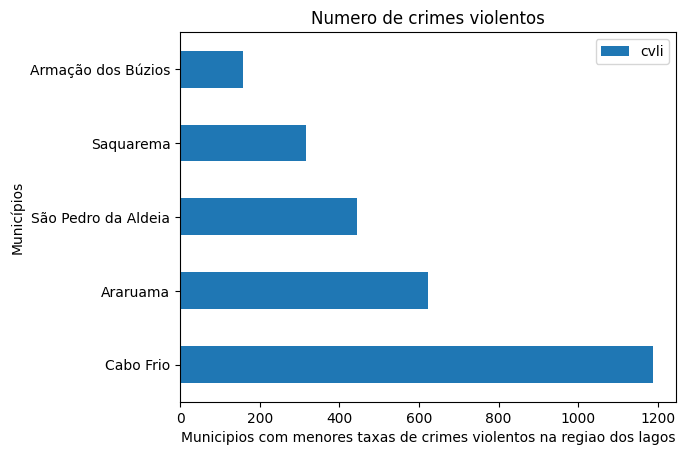

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep = ';',  encoding= 'latin1')
#df.info()
df.head(10)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,AperibÃ©,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,ArmaÃ§Ã£o dos BÃºzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3
5,3300258,Arraial do Cabo,2014,1,2014m01,Interior,0,0,0,0,...,1,0,26,0,0,0,0,0,176,3
6,3300308,Barra do PiraÃ­,2014,1,2014m01,Interior,1,0,0,1,...,19,0,56,0,0,0,0,0,248,3
7,3300407,Barra Mansa,2014,1,2014m01,Interior,5,0,0,5,...,25,0,54,2,1,0,0,0,430,3
8,3300456,Belford Roxo,2014,1,2014m01,Baixada Fluminense,29,0,0,29,...,16,0,231,22,3,0,0,0,1367,3
9,3300506,Bom Jardim,2014,1,2014m01,Interior,0,0,0,0,...,3,1,11,1,0,0,0,0,59,3


In [5]:
df_RL = df.loc[(df['fmun'] == 'Baixada Fluminense')]
df_menor = df_reg.groupby(['regiao', 'fmun'])['aaapai'].sum().reset_index()
df_menor = df_menor.sort_values(by = 'aaapai', ascending=False)



In [6]:
df_menor

,regiao,fmun,aaapai
1,Baixada Fluminense,Duque de Caxias,2971
8,Baixada Fluminense,Nova IguaÃ§u,2514
12,Baixada Fluminense,SÃ£o JoÃ£o de Meriti,2065
0,Baixada Fluminense,Belford Roxo,1513
5,Baixada Fluminense,MagÃ©,809
6,Baixada Fluminense,Mesquita,758
3,Baixada Fluminense,ItaguaÃ­,433
7,Baixada Fluminense,NilÃ³polis,407
10,Baixada Fluminense,Queimados,364
4,Baixada Fluminense,Japeri,257


In [7]:
df_menor_array = np.array(df_menor['aaapai'])
q1 = np.percentile(df_menor_array, 25)
q2 = np.percentile(df_menor_array, 50)
q3 = np.percentile(df_menor_array, 75)


In [9]:
print(f'Q1 = {q1}\nQ1 = {q2}\nQ3 = {q3}')

Q1 = 257.0
Q1 = 433.0
Q3 = 1513.0
